In [13]:
import numpy as np
from sympy import ntheory
from sympy.ntheory import continued_fraction_reduce
import matplotlib.pyplot as plt

In [5]:
def getOrtho(circ1,circ2):
    r1,x1 = circ1 
    r2,x2 = circ2
    c1 = x1**2-r1**2
    c2 = x2**2-r2**2
    x3 = (c1-c2)/(2*(h1-h2))
    r3 = np.sqrt(h**2+2*x1*h+c1)
    return (r3, x3)

def getDist(circ1,circ2):
    circ1,circ2 = getInv(circ1), getInv(circ2)
    t1,u1,v1 = circ1
    t2,u2,v2 = circ2
    return np.arccosh(t1*u2/2+t2*u1/2-v1*v2)
    
def normalToInv(circ):
    r,x = circ
    return ((x**2-r**2)/r, 1/r, x/r)

def InvToNormal(circ):
    t,u,v = circ
    r = 1/u
    x = r*v
    return (r,x)

def shear(pant1, pant2):
    i,j = -1,-1
    for g in range(3):
        for y in range(3):
            if pant1(g)==pant2(y):
                i,j = g,y
    if not i==-1:
        

SyntaxError: unexpected EOF while parsing (<ipython-input-5-ea26bb241abc>, line 33)

In [28]:
def isOdd(sequence):
    return len(sequence) % 2

In [29]:
def inv(lr_sequence):
    return tuple((np.array(lr_sequence[::-1]) - 1) ** 2)

In [38]:
def pairToFrac2(s1,s2):
    return recover2(list(s1) + [1] + list(inv(s2)) + [1])

In [39]:
def recover2(ls):
    output = []
    i = 0
    while i < len(ls):
        counter = 1
        while (i < len(ls) - 1 and ls[i] == ls[i + 1]):
            i += 1
            counter += 1
        i += 1
        output.append(counter)
    if isOdd(output):  
        output = [0]+output
    return output

In [105]:
def pantsInPlane(pants):
    circles = []
    s0,s1,s2 = pants
    y0 = pairToFrac2(s0,s1)
    y1 = pairToFrac2(s1,s2)
    y2 = pairToFrac2(s2,s0)
    B = np.array([[0,1],[-1,1]])
    alpha = ntheory.continued_fraction_reduce([y0])
    alpha_conj = -1/(ntheory.continued_fraction_reduce([y0[::-1]]))
    x_min = alpha_conj+1
    x_max = alpha+1
    r = (x_max-x_min)/2
    r = r.evalf()
    x = (x_min+x_max)/2
    x = x.evalf()
    circles.append((r,x))
    
    
    alpha = ntheory.continued_fraction_reduce([y1])
    alpha_conj = -1/(ntheory.continued_fraction_reduce([y1[::-1]]))
    x_min = alpha_conj+1
    x_max = alpha+1
    x_min = 1/(1-x_min)
    x_max = 1/(1-x_max)
    r = (x_max-x_min)/2
    r = r.evalf()
    x = (x_min+x_max)/2
    x = x.evalf()
    circles.append((r,x))
    
    alpha = ntheory.continued_fraction_reduce([y2])
    alpha_conj = -1/(ntheory.continued_fraction_reduce([y2[::-1]]))
    x_min = alpha_conj+1
    x_max = alpha+1
    x_min = 1-(1/x_min)
    x_max = 1-(1/x_max)
    r = (x_max-x_min)/2
    r = r.evalf()
    x = (x_min+x_max)/2
    x = x.evalf()
    circles.append((r,x))
    return circles
    
    

In [106]:
def plotPants(pants):
    fig, ax = plt.subplots()
    
    circ1, circ2, circ3 = pantsInPlane(pants)
    minimum = -1+min(circ1[1]-abs(circ1[0]), circ2[1]-abs(circ2[0]), circ3[1]-abs(circ3[0]))
    maximum = 1+max(circ1[1]+abs(circ1[0]), circ2[1]+abs(circ2[0]), circ3[1]+abs(circ3[0]))
    ax.set_xlim(float(minimum),float(maximum))
    ax.set_ylim(0, float(max(abs(circ1[0]), abs(circ2[0]), abs(circ3[0]))+1))
    
    circle1 = plt.Circle((circ1[1],0), abs(circ1[0]), fill = False)
    circle2 = plt.Circle((circ2[1],0), abs(circ2[0]), fill = False)
    circle3 = plt.Circle((circ3[1],0), abs(circ3[0]), fill = False)
    
    
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(circle3)
    ax.set_aspect('equal', adjustable='box')

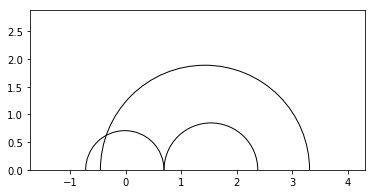

In [107]:
plotPants(([0,1,1,0,1,0,1],[0,0,1,1,1,1],[0,0,1,1,1]))

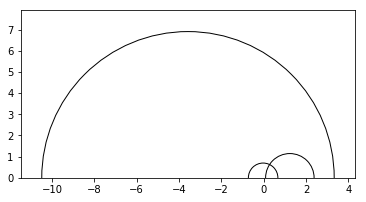

In [108]:
plotPants(([0,1,1,0,1,0,1,1,1,1,1,1]+1*[1]+800*[0],10*[1]+[0,0,1,1,1,1]+10*[1],[0,0,1,1,1]))

In [109]:
a = ntheory.continued_fraction_reduce([[1,3,4,3]]).evalf()+1

In [110]:
a_conj = -1/ntheory.continued_fraction_reduce([[3,4,3,1]]).evalf()+1

In [111]:
pantsInPlane(([0,1,1],[0,0,1,1,1,1],[0,0,1,1,1]))

[(0.809173593712687, 1.50000000000000),
 (-1.88549782307388, 1.42857142857143),
 (0.690065559342354, 0.e-126)]